## Install library

In [1]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 880.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 6.9 MB/s eta 0:00:00


## Using Langsmith
Langsmith is useful for building, managing, and debugging LLM-powered systems, especially those used in more complex workflows like retrieval-augmented generation (RAG), conversational agents, and multi-step chains.

In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········


## Tavily
Tavily is a platform designed to help businesses or individuals create intelligent, automated workflows using natural language processing (NLP) and AI models, particularly those for conversational agents, automated task processing, and content generation.

In [ ]:
os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


## Define three components: chat model, embeddings model and vector store

#### Chat model

In [4]:
%pip install -qU "langchain[groq]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter Groq API key: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("llama-3.1-8b-instant", model_provider="groq")

Enter Groq API key: ··········


In [6]:
from langchain_core.messages import HumanMessage

reponse = llm.invoke([HumanMessage(content="Hello world!")])
print(reponse.content)

Hello World. It's nice to meet you. Is there something I can help you with, or would you like to chat?


#### Embeddings model

In [7]:
%pip install -qU langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.3 MB/s eta 0:00:00


In [8]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
sentence = "Hello world"
sentence_embedding = embeddings.embed_documents([sentence])[0]
print(sentence_embedding)

[0.026249749585986137, 0.013395590707659721, -0.004533143248409033, -0.021791450679302216, 0.0545518696308136, -0.004966466221958399, 0.006655589677393436, 0.030626313760876656, -0.00576279079541564, -0.00456203380599618, -0.0033133092802017927, -0.04849626123905182, -0.011364013887941837, 0.03507741540670395, 0.09309469908475876, -0.08668743073940277, 0.05108654499053955, 0.009886124171316624, -0.06356927007436752, -0.008550182916224003, 0.007054391782730818, -0.0038624012377113104, 0.024744313210248947, 0.0428849495947361, 0.035094164311885834, -0.029848217964172363, 0.010252571664750576, 0.02234496735036373, 0.020890012383461, 0.00949222594499588, -0.03304440155625343, -0.01228414848446846, 0.05352891981601715, 0.02542921155691147, 2.0221771137585165e-06, -0.03419102728366852, 0.00961000844836235, -0.016484536230564117, 0.005609508603811264, -0.004250044468790293, -0.02280120737850666, 0.040354713797569275, 0.003052034880965948, 0.031372588127851486, -0.010812362655997276, -0.035570

#### Vector store

In [10]:
%pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.4 MB/s eta 0:00

In [11]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name = "my_collection",
    embedding_function = embeddings,
    persist_directory="./chroma_db"
)

## Chain

### Load and chunk contents

In [12]:
%pip install -qU pypdf
%pip install -qU nest_asyncio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 9.1 MB/s eta 0:00:00


In [13]:
from langchain_community.document_loaders import PyPDFLoader
import nest_asyncio

nest_asyncio.apply()

loader = PyPDFLoader("/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf")
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

print(f"{docs[0].metadata}\n")
print(docs[0].page_content)

{'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-30T00:46:15+00:00', 'moddate': '2025-03-24T19:01:09+07:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'title': '', 'keywords': '', 'author': '', 'subject': '', 'templateversion': 'IJCAI.2024.0', 'source': '/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf', 'total_pages': 10, 'page': 0, 'page_label': '1'}

Spatial-Temporal-Decoupled Masked Pre-training for Spatiotemporal Forecasting
Haotian Gao1,2 , Renhe Jiang1∗ , Zheng Dong2 , Jinliang Deng3 , Yuxin Ma2 , Xuan Song2
1The University of Tokyo,2Southern University of Science and Technology
3University of Technology Sydney
gaoht6@outlook.com, jiangrh@csis.u-tokyo.ac.jp, zhengdong00@outlook.com
jinliang.deng@student.uts.edu.au, mayx@sustech.edu.cn, songx@sustech.edu.cn
Abstract
Spatiotemporal forecasting techniques are signif-
icant for various doma

In [14]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# define splitter with each chunk is 1000 and overlap between two adjacent chunks is 200
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)
print(all_splits)

# Index chunks
_ = vector_store.add_documents(documents=all_splits)

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-30T00:46:15+00:00', 'moddate': '2025-03-24T19:01:09+07:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'title': '', 'keywords': '', 'author': '', 'subject': '', 'templateversion': 'IJCAI.2024.0', 'source': '/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf', 'total_pages': 10, 'page': 0, 'page_label': '1'}, page_content='Spatial-Temporal-Decoupled Masked Pre-training for Spatiotemporal Forecasting\nHaotian Gao1,2 , Renhe Jiang1∗ , Zheng Dong2 , Jinliang Deng3 , Yuxin Ma2 , Xuan Song2\n1The University of Tokyo,2Southern University of Science and Technology\n3University of Technology Sydney\ngaoht6@outlook.com, jiangrh@csis.u-tokyo.ac.jp, zhengdong00@outlook.com\njinliang.deng@student.uts.edu.au, mayx@sustech.edu.cn, songx@sustech.edu.cn\nAbstract\nSpatiotemporal forecasting techn

### Define tools

In [15]:
from langchain_core.tools import tool, Tool
from typing import Tuple

evaluated_context=[] # to evaluate later

# define retrieve documents function
@tool
def retrieve_documents(query: str) -> Tuple[str, list]:
    """Retrieve information related to user's document."""
    retrieved_docs = vector_store.similarity_search(query, k=3)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    evaluated_context.append([doc.page_content for doc in retrieved_docs])
    return serialized, retrieved_docs

# Initialize retreive documents tool
retrieve_documents_tool = Tool(
    name="retrieve_documents",
    description="Retrieve information related to user's query.",
    func=retrieve_documents,
)

retrieve_documents_tool("Main content in file?")

<ipython-input-15-74f5ae571d73>:24: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieve_documents_tool("Main content in file?")


("Source: {'author': '', 'creationdate': '2024-04-30T00:46:15+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2025-03-24T19:01:09+07:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf', 'subject': '', 'templateversion': 'IJCAI.2024.0', 'title': '', 'total_pages': 10, 'trapped': '/False'}\nContent: the input based on visible context. In NLP, approaches like\nBERT [Kenton and Toutanova, 2019 ] use masked language\nmodeling to predict randomly masked tokens with bidirec-\ntional context. Subsequent models [Liu et al., 2019; Lan et\nal., 2019] introduced more efficient masking techniques and\ndemonstrated performance gains from longer pre-training. In\nCV , similar masking strategies have been adopted. Meth-\nods like BEiT [Bao et al., 2021] and Masked AutoEncoder\n(MAE) [

In [16]:
evaluated_context

[['the input based on visible context. In NLP, approaches like\nBERT [Kenton and Toutanova, 2019 ] use masked language\nmodeling to predict randomly masked tokens with bidirec-\ntional context. Subsequent models [Liu et al., 2019; Lan et\nal., 2019] introduced more efficient masking techniques and\ndemonstrated performance gains from longer pre-training. In\nCV , similar masking strategies have been adopted. Meth-\nods like BEiT [Bao et al., 2021] and Masked AutoEncoder\n(MAE) [He et al., 2022] mask out random patches of input\nimages and do reconstruction based on unmasked patches. In\nboth domains, masked pre-training produces substantial im-\nprovements on various downstream tasks.\nRecently, many researchers have attempted to employ pre-\ntraining techniques on time series data to obtain superior hid-\nden representations [Nie et al. , 2022; Shao et al. , 2022b;\nLi et al., 2023]. However, these methods are either channel-\nindependent or neglect pre-training in the spatial dimen-'

### Define LangGraph component
Represent the state of our RAG application using a sequence of messages. Specifically, we will have:
1. User input as a HumanMessage;
2. Vector store query as an AIMessage with tool calls;
3. Retrieved documents as a ToolMessage;
4. Final response as a AIMessage.

In [17]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode
from langgraph.graph import START, MessagesState, StateGraph



# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve_documents_tool])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = [retrieve_documents]
tool_node = ToolNode(tools)


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use 20 sentences maximum and keep the "
        "answer detail."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

### Build graph

In [18]:
from langgraph.graph import MessagesState, StateGraph
from langgraph.graph import START, END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(MessagesState)
graph_builder.add_node(query_or_respond)
graph_builder.add_node("tool_node", tool_node)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tool_node"},
)
# graph_builder.add_edge("query_or_respond", "tool_node")
graph_builder.add_edge(START, "query_or_respond")
graph_builder.add_edge("tool_node", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

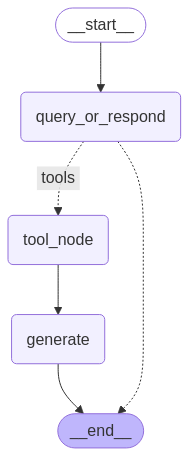

In [19]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
input_message = "What does the model do in my document?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What does the model do in my document?
================================== Ai Message ==================================
Tool Calls:
  retrieve_documents (call_wg9y)
 Call ID: call_wg9y
  Args:
    query: what does the model do in my document
================================= Tool Message =================================
Name: retrieve_documents

("Source: {'author': '', 'creationdate': '2024-04-30T00:46:15+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2025-03-24T19:01:09+07:00', 'page': 6, 'page_label': '7', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf', 'subject': '', 'templateversion': 'IJCAI.2024.0', 'title': '', 'total_pages': 10, 'trapped': '/False'}\nContent: Model PEMS04 PEMS08\nMAE/RMSE/MAPE MAE/RMSE/MAPE\

## Save history

In [21]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "123"}}

In [22]:
input_message = "What does the model do in my document?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What does the model do in my document?
================================== Ai Message ==================================
Tool Calls:
  retrieve_documents (call_8sk2)
 Call ID: call_8sk2
  Args:
    query: model in document function
================================= Tool Message =================================
Name: retrieve_documents

("Source: {'author': '', 'creationdate': '2024-04-30T00:46:15+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2025-03-24T19:01:09+07:00', 'page': 9, 'page_label': '10', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': '/content/data/Spatial-Temporal-Decoupled Masked Pre-training.pdf', 'subject': '', 'templateversion': 'IJCAI.2024.0', 'title': '', 'total_pages': 10, 'trapped': '/False'}\nContent: AAAI Conference on Artificial Intelligence , volume 34,\npa

In [23]:
messages = [HumanMessage(content="What is the most popular model?")]
response = graph.invoke({"messages": messages}, config=config)

print(response['messages'][-1].content)

Based on the provided text, it appears that STD-MAE is the most popular model, as it achieves superior performance over the baseline models on all evaluation metrics across all datasets. However, it's worth noting that the text does not provide a direct comparison of the popularity of different models, but rather focuses on the performance of STD-MAE in comparison to other models.


## Agent RAG model

In [24]:
%pip install -qU duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.4 MB/s eta 0:00:00


### Import search tool

In [25]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()
results = search_tool.invoke("Who's the current President of VietNam?")
print(results)

Vietnam elected Luong Cuong, a military general, as its new president on Monday, the fourth official to fill the largely ceremonial role in 18 months. Vietnam has elected Luong Cuong, a military general, as its new president, the fourth official to fill the role in 18 months. Two of Vietnam's current four pillars of political power, General Secretary To Lam and Prime Minister Pham Minh Chinh, were former security officials who held positions in the Ministry of Public Security. On Oct. 22, a ceremony was held at the Office of the President, where To Lam handed over the presidential duties to Cuong. BANGKOK (AP) — Vietnam's top security official To Lam was confirmed Wednesday as the nation's new president. He oversaw police and intelligence operations over a period when rights groups say basic liberties have been systematically suppressed, and its secret service was accused of violating international law. Lam was confirmed by Vietnam's National Assembly after his predecessor ... Luong Cu

In [46]:
from langgraph.prebuilt import create_react_agent

tools = [retrieve_documents_tool, search_tool]
agent_ai = create_react_agent(llm, tools, checkpointer=memory)

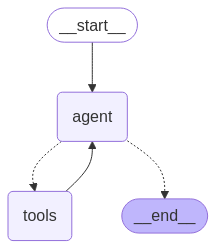

In [27]:
display(Image(agent_ai.get_graph().draw_mermaid_png()))

In [47]:
config = {"configurable": {"thread_id": "0"}}

input_message = (
    "How many districts are there in Ho Chi Minh City?"
)

for step in agent_ai.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many districts are there in Ho Chi Minh City?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_3yw4)
 Call ID: call_3yw4
  Args:
    query: number of districts in Ho Chi Minh City Vietnam
================================= Tool Message =================================
Name: duckduckgo_search

According to the resolution, after rearranging commune-level administrative units, Ho Chi Minh City has 22 district-level administrative units, including 16 districts, 5 counties and 1 city; 273 commune-level administrative units (including 210 wards, 58 communes and 5 towns). In 2021, Thu Duc City was officially established by merging three districts: Thu Duc, District 2, and District 9, becoming a separate city under the administration of Ho Chi Minh City. Thu Duc City borders Binh Duong, Dong Nai, and Binh Thanh provinces, making it quieter 

## Evaluate

### Load data

In [29]:
import json
import pprint

# load json file
# data from url: https://www.kaggle.com/code/stpeteishii/questionanswer-t5-model-fit-predict
file_path = 'data/train-v1.1.json'

with open(file_path, 'r') as file:
    dataset = json.load(file)

pprint.pprint(dataset["data"][0])

{'paragraphs': [{'context': 'Architecturally, the school has a Catholic '
                            "character. Atop the Main Building's gold dome is "
                            'a golden statue of the Virgin Mary. Immediately '
                            'in front of the Main Building and facing it, is a '
                            'copper statue of Christ with arms upraised with '
                            'the legend "Venite Ad Me Omnes". Next to the Main '
                            'Building is the Basilica of the Sacred Heart. '
                            'Immediately behind the basilica is the Grotto, a '
                            'Marian place of prayer and reflection. It is a '
                            'replica of the grotto at Lourdes, France where '
                            'the Virgin Mary reputedly appeared to Saint '
                            'Bernadette Soubirous in 1858. At the end of the '
                            'main drive (and in a direct li

In [32]:
%pip install -q datasets

In [33]:
import datasets
from langchain.docstore.document import Document

def load_document_qna(data):
  # Convert dataset entries into Document objects
  docs = [
      Document(
          page_content="\n".join([
              f"context: {paragraph['context']}",
          ]),
          metadata={"name": data["title"]}
      )
      for paragraph in data['paragraphs']
  ]

  contexts = [
      [paragraph['context']] for paragraph in data['paragraphs'] for i in range(len(paragraph['qas']))
  ]

  questions = [
      paragraph['qas'][i]['question']
      for paragraph in data['paragraphs'] for i in range(len(paragraph['qas']))
  ]

  ground_truth = [
      paragraph['qas'][i]['answers'][0]["text"]
      for paragraph in data['paragraphs'] for i in range(len(paragraph['qas']))
  ]

  return docs, contexts, questions, ground_truth

In [34]:
docs, contexts, questions, ground_truth = load_document_qna(dataset["data"][0])
print(docs[0])
print(contexts)
print(questions)
print(ground_truth)

page_content='context: Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.' metadata={'name': 'University_of_Notre_Dame'}
[['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms uprais

In [35]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name = "my_collection",
    embedding_function = embeddings,
    persist_directory="./chroma_db"
)

In [36]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# define splitter with each chunk is 1000 and overlap between two adjacent chunks is 200
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)
print(all_splits)

# Index chunks
_ = vector_store.add_documents(documents=all_splits)

[Document(metadata={'name': 'University_of_Notre_Dame'}, page_content='context: Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'), Document(metadata={'name': 'University_of_Notre_Dame'}, page_content="context: As at most other universities, Notre Dame's students run a number of news media outlets. The nine student-run outlets include three newspaper

In [37]:
%pip install -q ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.6 MB/s eta 0:00:00


In [38]:
from langgraph.prebuilt import create_react_agent

tools = [retrieve_documents_tool]
agent_ai = create_react_agent(llm, tools)

In [39]:
# What is the Grotto at Notre Dame?

messages = [HumanMessage(content="What is the Grotto at Notre Dame?")]
response = agent_ai.invoke({"messages": messages})

print(response['messages'][-1].content)

The Grotto at Notre Dame is a replica of the original grotto in Lourdes, France, where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. It is a popular place of prayer and meditation among students and alumni and is considered one of the most beloved spots on campus.


In [ ]:
# input_message = (
#     "What is the Grotto at Notre Dame?"
# )

# for step in agent_ai.stream(
#     {"messages": [{"role": "user", "content": input_message}]},
#     stream_mode="values",
# ):
#     step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the Grotto at Notre Dame?
================================== Ai Message ==================================
Tool Calls:
  retrieve_documents (call_e8jv)
 Call ID: call_e8jv
  Args:
    query: Grotto at Notre Dame
================================= Tool Message =================================
Name: retrieve_documents

('Source: {\'name\': \'University_of_Notre_Dame\'}\nContent: context: Because of its Catholic identity, a number of religious buildings stand on campus. The Old College building has become one of two seminaries on campus run by the Congregation of Holy Cross. The current Basilica of the Sacred Heart is located on the spot of Fr. Sorin\'s original church, which became too small for the growing college. It is built in French Revival style and it is decorated by stained glass windows imported directly from France. The interior was painted by Luigi Gregori, an Italian painter invited by F

In [40]:
evaluated_answers = []
evaluated_context = []

for question in questions:
    response = agent_ai.invoke({"messages": question})
    evaluated_answers.append(response['messages'][-1].content)
    print("question:", question)
    print("answer:",response['messages'][-1].content)
    print()

question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
answer: According to the retrieved documents, the Virgin Mary allegedly appeared in 1858 in Lourdes, France, to Saint Bernadette Soubirous.
question: What is in front of the Notre Dame Main Building?
answer: The Notre Dame Main Building is in front of the Theodore M. Hesburgh Library, with the Word of Life mural, commonly known as "Touchdown Jesus", adorning the front of the library.
question: The Basilica of the Sacred heart at Notre Dame is beside to which structure?
answer: The Basilica of the Sacred Heart at Notre Dame is beside the Main Building and the Grotto, a Marian place of prayer and reflection.
question: What is the Grotto at Notre Dame?
answer: The Grotto at Notre Dame is a Marian place of prayer and reflection located behind the Basilica of the Sacred Heart. It is a replica of the grotto at Lourdes, France, where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. It is

KeyboardInterrupt: 

In [42]:
print(len(evaluated_answers))
evaluated_answers

20


['According to the retrieved documents, the Virgin Mary allegedly appeared in 1858 in Lourdes, France, to Saint Bernadette Soubirous.',
 'The Notre Dame Main Building is in front of the Theodore M. Hesburgh Library, with the Word of Life mural, commonly known as "Touchdown Jesus", adorning the front of the library.',
 'The Basilica of the Sacred Heart at Notre Dame is beside the Main Building and the Grotto, a Marian place of prayer and reflection.',
 'The Grotto at Notre Dame is a Marian place of prayer and reflection located behind the Basilica of the Sacred Heart. It is a replica of the grotto at Lourdes, France, where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. It is a popular spot among students and alumni for prayer and meditation, and is considered one of the most beloved spots on campus.',
 'The answer to your question is not explicitly stated in the provided output. However, based on the information given, it appears that the main building at Notr

In [ ]:
# from datasets import Dataset
# from ragas.metrics import (
#     faithfulness,
#     answer_relevancy,
#     context_precision,
#     context_recall,
# )
# from ragas import evaluate
# from ragas.llms import LangchainLLMWrapper

# faithfulness.llm = LangchainLLMWrapper(llm)
# answer_relevancy.llm = LangchainLLMWrapper(llm)
# context_precision.llm = LangchainLLMWrapper(llm)
# context_recall.llm = LangchainLLMWrapper(llm)

# data = {
#     "question": questions,
#     "answer": answers,
#     "contexts": contexts,
#     "ground_truth": ground_truth,
# }

# evaluate_dataset = Dataset.from_dict(data)

# result = evaluate(dataset=evaluate_dataset, metrics=[
#     faithfulness,
#     answer_relevancy,
#     context_recall,
#     context_precision,
# ])

# result.to_pandas().to_csv("result.csv", sep=",")


In [44]:
from datasets import Dataset
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def custom_evaluate(dataset):
    model = SentenceTransformer('all-MiniLM-L6-v2')

    questions = dataset['question']
    answers = dataset['answer']
    contexts = dataset['contexts']  # List của lists
    ground_truths = dataset['ground_truth']

    results = {
        'faithfulness': [],
        'answer_relevancy': [],
        'context_precision': [],
        'context_recall': []
    }

    # Duyệt qua từng mẫu
    for q, a, ctxs, gt in zip(questions, answers, contexts, ground_truths):
        # convert to embeddings
        q_emb = model.encode(q)
        a_emb = model.encode(a)
        ctx_embs = model.encode(ctxs)
        gt_emb = model.encode(gt)

        # 1. Faithfulness: Similarity between answer and contexts
        faithfulness_score = np.mean([cosine_similarity([a_emb], [ctx_emb])[0][0] for ctx_emb in ctx_embs])
        results['faithfulness'].append(faithfulness_score)

        # 2. Answer Relevancy: Similarity between answer and question
        relevancy_score = cosine_similarity([a_emb], [q_emb])[0][0]
        results['answer_relevancy'].append(relevancy_score)

        # 3. Context Precision: Rate of similarity contexts and answer
        ctx_similarities = [cosine_similarity([a_emb], [ctx_emb])[0][0] for ctx_emb in ctx_embs]
        precision_score = sum(1 for sim in ctx_similarities if sim > 0.5) / len(ctxs) if ctxs else 0
        results['context_precision'].append(precision_score)

        # 4. Context Recall: Rate of similarity contexts and ground truth
        ctx_gt_similarities = [cosine_similarity([ctx_emb], [gt_emb])[0][0] for ctx_emb in ctx_embs]
        recall_score = np.mean(ctx_gt_similarities) if ctx_gt_similarities else 0
        results['context_recall'].append(recall_score)

    # mean of each metric
    avg_results = {metric: np.mean(scores) for metric, scores in results.items()}
    return results, avg_results

data = {
    "question": questions[:20],
    "answer": evaluated_answers[:20],
    "contexts": evaluated_context[:20],
    "ground_truth": ground_truth[:20],
}

# Create dataset
evaluate_dataset = Dataset.from_dict(data)

# Evaluation function
detailed_results, avg_results = custom_evaluate(evaluate_dataset)

# Print
print("Detailed Results:")
for metric, scores in detailed_results.items():
    print(f"{metric}: {scores}")
print("\nAverage Results:")
for metric, score in avg_results.items():
    print(f"{metric}: {score:.4f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Detailed Results:
faithfulness: [np.float32(0.5223538), np.float32(0.62103224), np.float32(0.6359313), np.float32(0.71960855), np.float32(0.53720117), np.float32(0.457749), np.float32(0.3852863), np.float32(0.4050525), np.float32(0.55333424), np.float32(0.30082864), np.float32(0.48411322), np.float32(0.6245577), np.float32(0.48972893), np.float32(0.4609891), np.float32(0.35513154), np.float32(0.57282937), np.float32(0.5214058), np.float32(0.5372769), np.float32(0.43919864), np.float32(0.55498296)]
answer_relevancy: [np.float32(0.88356614), np.float32(0.67874026), np.float32(0.85078406), np.float32(0.78265405), np.float32(0.8149312), np.float32(0.8550401), np.float32(0.7839207), np.float32(0.79889464), np.float32(0.7998103), np.float32(0.8925022), np.float32(0.8717911), np.float32(0.75937176), np.float32(0.8462083), np.float32(0.81721866), np.float32(0.59663105), np.float32(0.8630606), np.float32(0.8950826), np.float32(0.86212516), np.float32(0.8662462), np.float32(0.9351191)]
context_p